# Problem Statement

Develop a new app(or in-store)feature in which customer would enter their own height and weight and system would predict what size of T-shirt should they wear.Input feature are height and weight and output is S(small size) and L(Large size)

## Importing Libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import matplotlib

%matplotlib inline

# check the versions of imported libraries
print("Pandas->",pd.__version__)
print("Numpy->",np.__version__)
print("seaborn->",sns.__version__)
print("Scikit-learn->",sklearn.__version__)
print("Matplotlib->",matplotlib.__version__)

Pandas-> 0.25.3
Numpy-> 1.18.1
seaborn-> 0.9.0
Scikit-learn-> 0.22.2.post1
Matplotlib-> 3.1.2


## Importing Dataset

In [2]:
tshirt = pd.read_csv('dataset/Tshirt_Sizing_Dataset.csv')

In [3]:
tshirt.head()

,Height (in cms),Weight (in kgs),T Shirt Size
0,158,58,S
1,158,59,S
2,158,63,S
3,160,59,S
4,160,60,S


In [4]:
tshirt.tail()

,Height (in cms),Weight (in kgs),T Shirt Size
13,168,63,L
14,168,66,L
15,170,63,L
16,170,64,L
17,170,68,L


In [11]:
tshirt.describe()

,Height (in cms),Weight (in kgs)
count,18.00000,18.000000
mean,164.00000,62.333333
std,4.32503,2.634611
min,158.00000,58.000000
25%,160.00000,60.250000
50%,164.00000,62.500000
75%,168.00000,64.000000
max,170.00000,68.000000


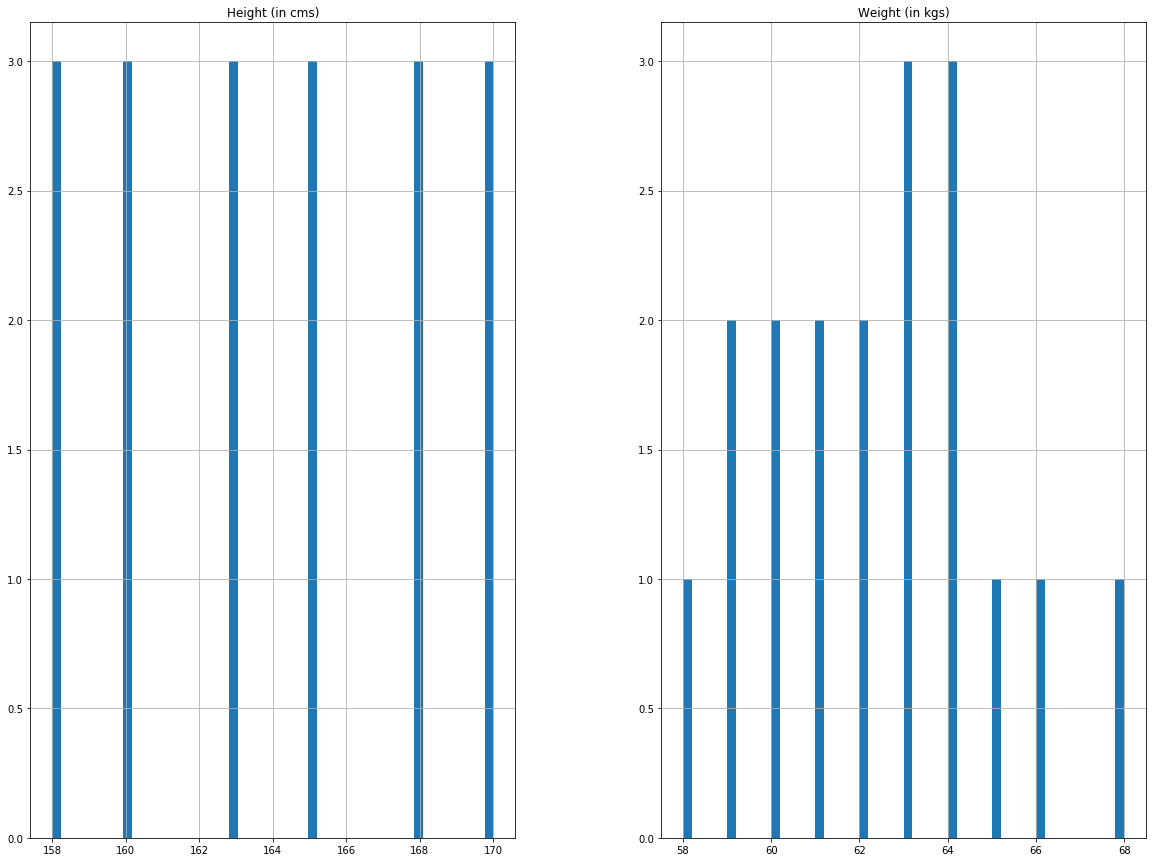

In [12]:
tshirt.hist(bins = 50, figsize =(20,15))
plt.show()

# Creating Training and Testing dataset

In [15]:
X = tshirt.iloc[:, 0:2].values

In [19]:
print(X)
X.shape

[[158  58]
 [158  59]
 [158  63]
 [160  59]
 [160  60]
 [163  60]
 [163  61]
 [160  64]
 [163  64]
 [165  61]
 [165  62]
 [165  65]
 [168  62]
 [168  63]
 [168  66]
 [170  63]
 [170  64]
 [170  68]]


(18, 2)

In [20]:

y = tshirt.iloc[:, 2].values

In [21]:
y

array(['S', 'S', 'S', 'S', 'S', 'S', 'S', 'L', 'L', 'L', 'L', 'L', 'L',
       'L', 'L', 'L', 'L', 'L'], dtype=object)

In [22]:
# Encoding y feature from string to interger since this is binary to we are not using onehotencoder

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [23]:
y

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [35]:
# spliting data into train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)

In [36]:
X_train.shape

(13, 2)

In [37]:
X_test.shape

(5, 2)

In [38]:
y_train.shape

(13,)

In [39]:
y_test.shape

(5,)

# Model Training

In [40]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

# Model Testing

In [41]:
y_pred = classifier.predict(X_test)

In [42]:
y_pred

array([1, 1, 0, 1, 0])

In [43]:
y_test

array([1, 1, 0, 1, 0])

In [48]:
# Creating confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [49]:
cm

array([[2, 0],
       [0, 3]], dtype=int64)

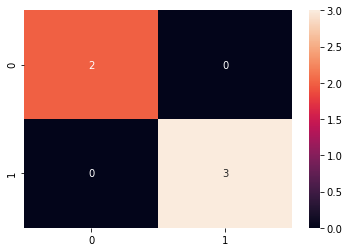

In [50]:
sns.heatmap(cm, annot = True, )

# Testing results Visualization

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


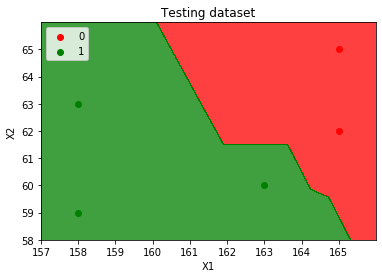

In [58]:
#Visualising the Training set results

from matplotlib.colors import ListedColormap
X_grid, y_grid = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_grid[:, 0].min() - 1, stop = X_grid[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_grid[:, 1].min() - 1, stop = X_grid[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_grid)):
    plt.scatter(X_grid[y_grid == j, 0], X_grid[y_grid == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('Testing dataset')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()